<a href="https://colab.research.google.com/github/cxbxmxcx/CalgaryDeepLearning/blob/master/DLB_fashion_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

Download and install TensorFlow 2. Import TensorFlow into your program:

Note: Upgrade `pip` to install the TensorFlow 2 package. See the [install guide](https://www.tensorflow.org/install) for details.

In [34]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np

%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt
plt.gray()

print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

TensorFlow 2.x selected.
TensorFlow version: 2.1.0
Is Executing Eagerly? True


<Figure size 432x288 with 0 Axes>

TensorFlow version: 2.1.0
Is Executing Eagerly? True


<Figure size 432x288 with 0 Axes>

TensorFlow version: 2.1.0
Is Executing Eagerly? True


<Figure size 432x288 with 0 Axes>

In [35]:
# load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# split dataset
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype("float32") / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
import math

def plot_data(num_images, images, labels):
  grid = math.ceil(math.sqrt(num_images))
  plt.figure(figsize=(grid*2,grid*2))
  for i in range(num_images):
      plt.subplot(grid,grid,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)     
      plt.imshow(images[i].reshape(28,28))
      plt.xlabel(class_names[labels[i]])      
  plt.show()

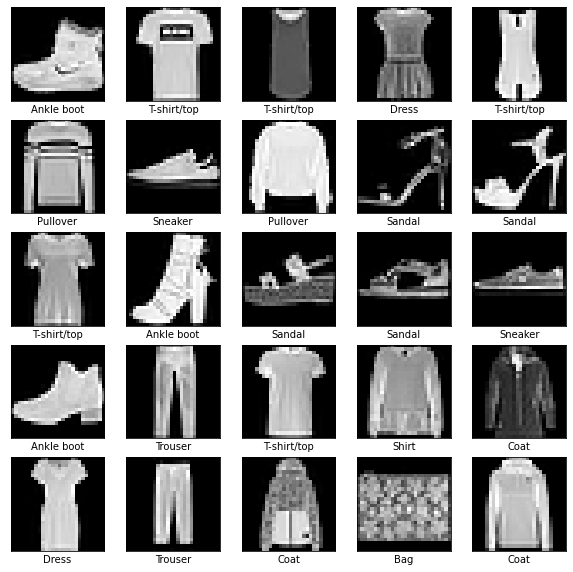

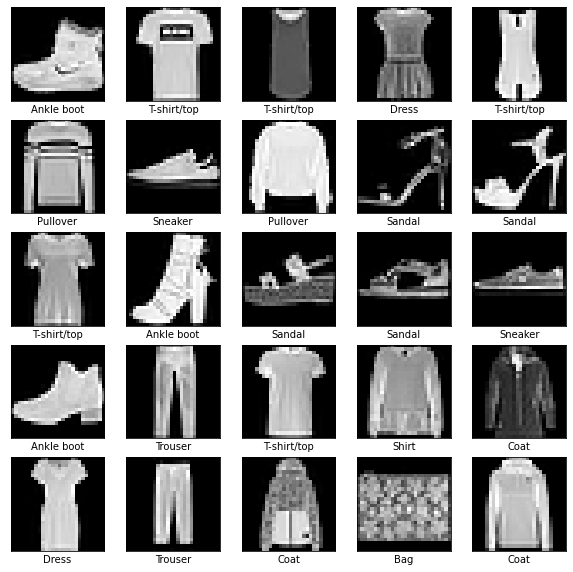

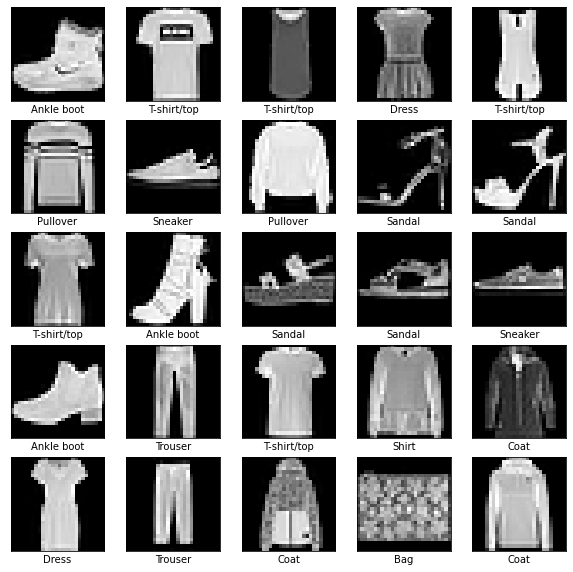

In [38]:
plot_data(25, x_train, y_train)

Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.MaxPool2D( (2, 2), padding='same'),
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

For each example the model returns a vector of "[logits](https://developers.google.com/machine-learning/glossary#logits)" or "[log-odds](https://developers.google.com/machine-learning/glossary#log-odds)" scores, one for each class.

In [40]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.03775256, -0.02243852,  0.06345336,  0.00482491, -0.06801008,
        -0.22260968,  0.05126027, -0.1068346 ,  0.0308971 ,  0.11527485]],
      dtype=float32)

array([[ 0.04214971,  0.05028728,  0.05698877, -0.1189315 ,  0.00052899,
        -0.02677344, -0.03141267,  0.24010007, -0.09996323, -0.01821023]],
      dtype=float32)

array([[-0.01688658,  0.01636975,  0.13588867,  0.05063821, -0.02590973,
         0.08041503, -0.06060056,  0.02172355, -0.01558831,  0.01565415]],
      dtype=float32)

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  1605760   
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  1290      
Total params: 1,607,690
Trainable params: 1,607,690
Non-trainable params: 0
______________________________________________

The `tf.nn.softmax` function converts these logits to "probabilities" for each class: 

In [42]:
tf.nn.softmax(predictions).numpy()

array([[0.09775539, 0.09926394, 0.10816678, 0.10200746, 0.09484186,
        0.08125654, 0.10685591, 0.09123024, 0.10470199, 0.11391993]],
      dtype=float32)

array([[0.10283935, 0.10367963, 0.10437676, 0.08753921, 0.09864696,
        0.09599008, 0.0955458 , 0.12535107, 0.08921552, 0.09681559]],
      dtype=float32)

array([[0.09621941, 0.09947312, 0.11210169, 0.10294098, 0.09535512,
        0.10605234, 0.09210388, 0.10000711, 0.09634441, 0.09940196]],
      dtype=float32)

Note: It is possible to bake this `tf.nn.softmax` in as the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to
provide an exact and numerically stable loss calculation for all models when using a softmax output. 

The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the the true class:
It is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.log(1/10) ~= 2.3`.

In [44]:
loss_fn(y_train[:1], predictions).numpy()

2.1722593

2.334947

2.3085835

In [0]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

The `Model.fit` method adjusts the model parameters to minimize the loss: 

In [29]:
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3928 - accuracy: 0.8597 - val_loss: 0.2957 - val_accuracy: 0.8921
Epoch 2/15
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2670 - accuracy: 0.9029 - val_loss: 0.2626 - val_accuracy: 0.9038
Epoch 3/15
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2257 - accuracy: 0.9164 - val_loss: 0.2505 - val_accuracy: 0.9103
Epoch 4/15
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1971 - accuracy: 0.9263 - val_loss: 0.2447 - val_accuracy: 0.9131
Epoch 5/15
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1699 - accuracy: 0.9371 - val_loss: 0.2494 - val_accuracy: 0.9158
Epoch 6/15
60000/60000 [==============================] - 5s 92us/sample - loss: 0.1501 - accuracy: 0.9438 - val_loss: 0.2630 - val_accuracy: 0.9152
Epoch 7/15
60000/60000 [==============================]

The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)".

10000/10000 - 1s - loss: 0.3546 - accuracy: 0.9212


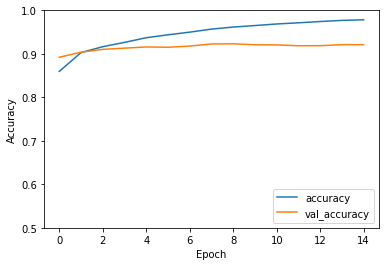

10000/10000 - 1s - loss: 0.3592 - accuracy: 0.9216


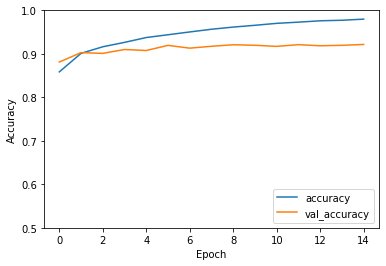

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy') 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2) 

In [0]:
def plot_predictions(num_images, images, labels):
  grid = math.ceil(math.sqrt(num_images))
  plt.figure(figsize=(grid*2,grid*2))
  for i in range(num_images):
      plt.subplot(grid,grid,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)     
      plt.imshow(images[i].reshape(28,28))
      p = np.argmax(labels[i])      
      plt.xlabel(class_names[p])      
  plt.show()

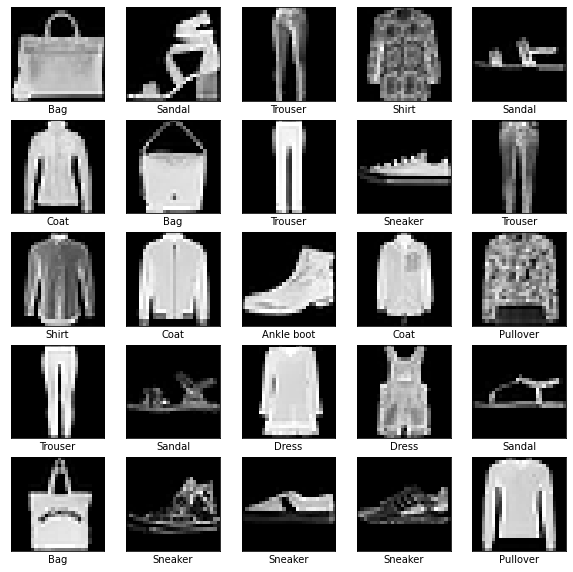

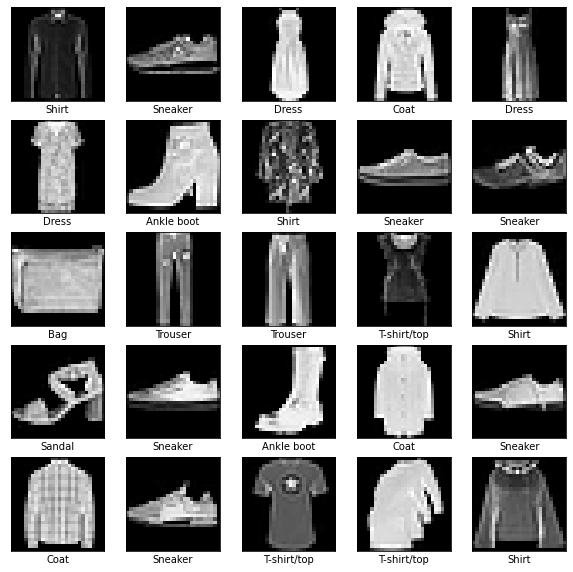

In [32]:
n = np.random.randint(0,len(x_test)-25)
preds = model.predict(x_test[n:n+25])

plot_predictions(25, x_test[n:n+25], preds )